In [1]:
#Import Packages
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

In [2]:
# Load data
# Solution
# UTF Encoding
df = pd.read_csv("new_Kolodziejczyk_raw_data.csv",encoding='latin1')

In [3]:
df.head(10)

,ola_mES_2i_2_10.counts,ola_mES_2i_2_11.counts,ola_mES_2i_2_12.counts,ola_mES_2i_2_13.counts,ola_mES_2i_2_14.counts,ola_mES_2i_2_15.counts,ola_mES_2i_2_16.counts,ola_mES_2i_2_17.counts,ola_mES_2i_2_18.counts,ola_mES_2i_2_19.counts,...,ola_mES_lif_3_87.counts,ola_mES_lif_3_88.counts,ola_mES_lif_3_89.counts,ola_mES_lif_3_9.counts,ola_mES_lif_3_90.counts,ola_mES_lif_3_92.counts,ola_mES_lif_3_94.counts,ola_mES_lif_3_95.counts,ola_mES_lif_3_96.counts,Unnamed: 703
0,272,368,1431,2249,385,1053,1424,1117,991,530,...,211,251,71,40,620,1235,255,1142,644,278
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,271,983,1248,971,1149,432,2406,863,179,888,...,91,175,11,55,228,122,126,60,161,39
3,0,0,0,0,0,0,0,0,0,0,...,1,1,469,32,3,1729,55,0,25,214
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,16,0,0,0,0,0,0,99,0,16,...,0,0,6,0,144,1,32,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,616,0,0,0,1
8,517,1588,857,73,488,527,93,427,85,196,...,198,181,350,31,17,3647,614,1204,280,63
9,0,1,637,0,7,424,332,0,0,2,...,5,175,1,89,101,339,11,5,0,141


In [4]:
df.describe()

,ola_mES_2i_2_10.counts,ola_mES_2i_2_11.counts,ola_mES_2i_2_12.counts,ola_mES_2i_2_13.counts,ola_mES_2i_2_14.counts,ola_mES_2i_2_15.counts,ola_mES_2i_2_16.counts,ola_mES_2i_2_17.counts,ola_mES_2i_2_18.counts,ola_mES_2i_2_19.counts,...,ola_mES_lif_3_87.counts,ola_mES_lif_3_88.counts,ola_mES_lif_3_89.counts,ola_mES_lif_3_9.counts,ola_mES_lif_3_90.counts,ola_mES_lif_3_92.counts,ola_mES_lif_3_94.counts,ola_mES_lif_3_95.counts,ola_mES_lif_3_96.counts,Unnamed: 703
count,38653.000000,38653.000000,38653.000000,38653.000000,38653.000000,38653.000000,38653.000000,38653.000000,38653.000000,38653.000000,...,38653.000000,38653.000000,38653.000000,38653.000000,38653.000000,38653.000000,38653.000000,38653.000000,38653.000000,38653.000000
mean,85.117455,160.751248,197.399322,203.287921,119.501074,108.517916,189.463638,120.651256,117.059116,322.376452,...,38.253874,65.910537,72.217111,26.898404,68.519468,145.586837,62.635966,67.288438,62.934339,38.596952
std,586.271462,1132.187939,1326.173396,1263.101481,820.483474,745.350546,1258.647717,767.086568,780.562152,1941.377895,...,687.462581,1213.745496,1547.943118,562.291736,1575.553172,5168.652556,1228.023589,1645.763639,1317.051799,724.998934
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000,1.000000,6.000000,4.000000,1.000000,...,2.000000,4.000000,2.000000,1.000000,2.000000,0.000000,5.000000,2.000000,4.000000,2.000000
max,45350.000000,78237.000000,106445.000000,90629.000000,59270.000000,48977.000000,110521.000000,59947.000000,54007.000000,145930.000000,...,80849.000000,145955.000000,187389.000000,68635.000000,219839.000000,622407.000000,147482.000000,195757.000000,159166.000000,86913.000000


In [5]:
df.shape

(38653, 704)

In [6]:
#Change column names to upper case
df.columns = df.columns.str.upper()

In [7]:
#Check for missing values
#Total Number of Missing NA
df.isnull().sum().sum()

0

In [8]:
#Replace missing values with the mean
df_mean = df.fillna(df.mean())

In [9]:
#Remove dupplicates
df_drop_dup = df.drop_duplicates()

## Splitting Data

In [10]:
#Given x-input and y-output
# y= df["V1"]
# x = df.drop(columns="V1")
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
# x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

#Given x-inputs
x_train, x_test = train_test_split(df, test_size = 0.2, random_state=42)
x_train2, x_val = train_test_split(x_train, test_size = 0.2, random_state=42)

In [11]:
print(len(x_train2))
print(len(x_test))
print(len(x_val))

24737
7731
6185


## Scaling

In [12]:
#Using standard scaler
scaler = StandardScaler().fit(x_train2)

In [13]:
df_scaled = scaler.transform(x_train2)

In [14]:
df_scaled

array([[-0.13892971, -0.1401633 , -0.14723415, ..., -0.06211306,
        -0.07733632, -0.08477843],
       [-0.01901606, -0.05362185, -0.06457578, ..., -0.05547235,
        -0.06168649, -0.06451108],
       [-0.08221379, -0.1401633 , -0.12414938, ...,  0.24003944,
         0.43341739, -0.02144296],
       ...,
       [ 1.65005232,  0.88697015,  0.33680136, ...,  1.30919446,
         1.42362514,  1.64807991],
       [-0.13892971, -0.1401633 , -0.14723415, ..., -0.06211306,
        -0.07733632, -0.08477843],
       [-0.13892971, -0.1401633 , -0.14723415, ..., -0.06211306,
        -0.07733632, -0.08477843]])

## Transformation

In [15]:
#Using log transformation
def log_transform(x):
    return np.log(x + 1)

df_log = log_transform(df_scaled)

In [16]:
df_log

array([[-0.14957914, -0.1510128 , -0.15927027, ..., -0.06412587,
        -0.08049049, -0.08858909],
       [-0.01919919, -0.05511305, -0.06675514, ..., -0.05707032,
        -0.06367115, -0.06668597],
       [-0.0857908 , -0.1510128 , -0.13255973, ...,  0.21514319,
         0.36006138, -0.0216762 ],
       ...,
       [ 0.97457938,  0.63497245,  0.29027972, ...,  0.83689875,
         0.88526441,  0.97383481],
       [-0.14957914, -0.1510128 , -0.15927027, ..., -0.06412587,
        -0.08049049, -0.08858909],
       [-0.14957914, -0.1510128 , -0.15927027, ..., -0.06412587,
        -0.08049049, -0.08858909]])

## Dimensionality Reduction

In [17]:
#Using PCA
DPCA = PCA(n_components=10)
df_pca = DPCA.fit_transform(df_log)

In [18]:
df_pca

array([[-2.02895422e+00,  6.16940429e-02, -6.58129234e-03, ...,
        -2.12114256e-02, -7.45758278e-03,  2.77070806e-02],
       [-1.07162235e+00, -2.61180738e-01, -1.33027299e-01, ...,
         9.63856367e-02,  8.94138553e-02,  1.47541613e-03],
       [ 2.53811810e-01,  8.53004527e-01, -1.15446626e+00, ...,
         6.42690213e-02,  3.31746252e-02,  1.23643579e-01],
       ...,
       [ 1.95281198e+01,  2.42187944e+00, -1.36842945e+00, ...,
        -1.32664314e+00,  1.36181467e-02, -1.18206553e+00],
       [-1.68002126e+00,  1.52785146e-01,  3.68731379e-01, ...,
        -8.17613804e-02,  2.28224840e-02,  1.45717791e-02],
       [-2.02902805e+00,  6.17001680e-02, -6.64878843e-03, ...,
        -2.11208207e-02, -7.49012850e-03,  2.75886050e-02]])

Text(0.5, 1.0, 'Principal Component Analysis')

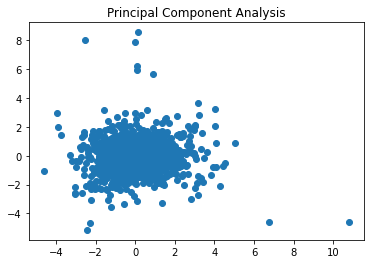

In [19]:
#Projecting the PCA result
plt.scatter(df_pca[:,5], df_pca[:,6])
plt.title("Principal Component Analysis")

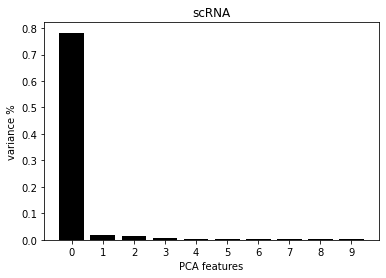

In [20]:
features = range(DPCA.n_components_)
plt.bar(features, DPCA.explained_variance_ratio_, color='black')
plt.title("scRNA")
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()


In [21]:
#using tSNE
#tSNE
tsne = TSNE(n_components = 2)
dataTSNE = tsne.fit_transform(df_log)

C:\Users\mnnadi1\.conda\envs\yanma\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\mnnadi1\.conda\envs\yanma\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [22]:
dataTSNE

array([[-30.164862, -12.879215],
       [ 49.068283,   7.445214],
       [ -8.423966, -36.304947],
       ...,
       [  5.644676, -52.48299 ],
       [ 24.307104,  35.19221 ],
       [-27.924452,  -2.511671]], dtype=float32)

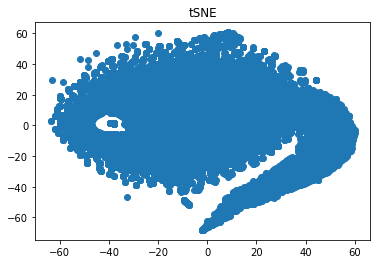

In [23]:
plt.scatter(dataTSNE[:,0], dataTSNE[:,1])
plt.title("tSNE")
plt.show()

In [24]:
#using UMAP
#umap
reducer = umap.UMAP()
data_UMAP = reducer.fit_transform(df_log)

In [25]:
data_UMAP

array([[-13.184534  ,  -1.3311837 ],
       [  0.9945692 ,   5.7693405 ],
       [ -6.5622177 ,   2.33819   ],
       ...,
       [ 10.103523  ,   5.6264534 ],
       [  0.61249715,   4.984762  ],
       [-16.108685  ,  -2.6246574 ]], dtype=float32)

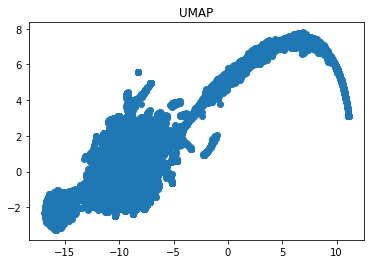

In [26]:
plt.scatter(data_UMAP[:,0], data_UMAP[:,1])
plt.title("UMAP")
plt.show()